In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest8.csv")
df.head(20)

,question_id,student_answer,score
0,8,الملك هو الروح الامين جبريل,1
1,8,جبريل,1
2,8,جبريل عليه السلام,1
3,8,جبريل,1
4,8,جبريل عليه السلام,1
5,8,جبريل الأمين,1
6,8,جبريل,1
7,8,جبريل,1
8,8,جبريل,1
9,8,جبريل,1


In [164]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     107 non-null    int64 
 1   student_answer  107 non-null    object
 2   score           107 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [165]:
df.groupby('score').size()

score
0      3
1    104
dtype: int64

In [166]:
df.duplicated().sum()

89

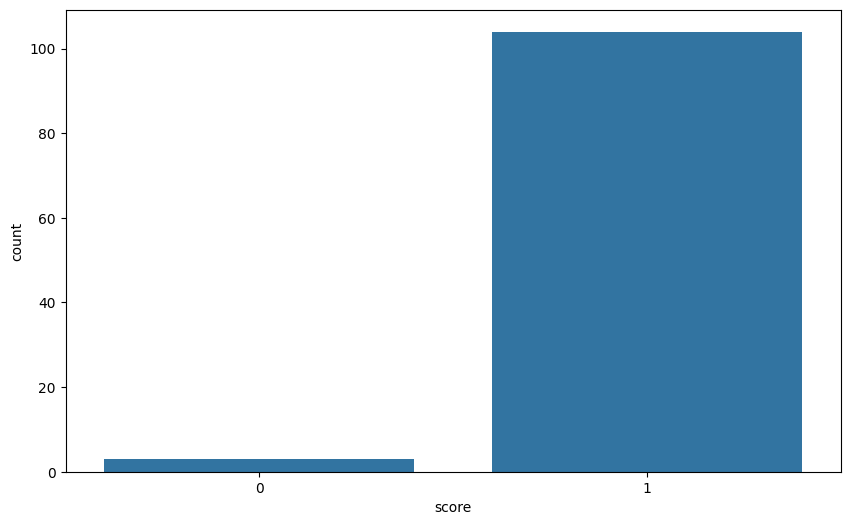

In [167]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [168]:
import pandas as pd
df = pd.read_csv('./quest8.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 5 ))
csv = './question8.csv'
df2.to_csv(csv,index=False)
print(len(df1))

18


In [170]:
df = pd.read_csv("question8.csv")
df.head(20)

,question_id,student_answer,score
0,8,الملك هو الروح الامين جبريل,5
1,8,جبريل,5
2,8,جبريل عليه السلام,5
3,8,جبريل عليه السلام,5
4,8,جبريل الأمين,5
5,8,جبريل,5
6,8,جبريل الروح الأمين,5
7,8,جبريل عليه السلام,5
8,8,الملك جبريل,5
9,8,النبي الذي جاء بالوحي هو جبريل,5


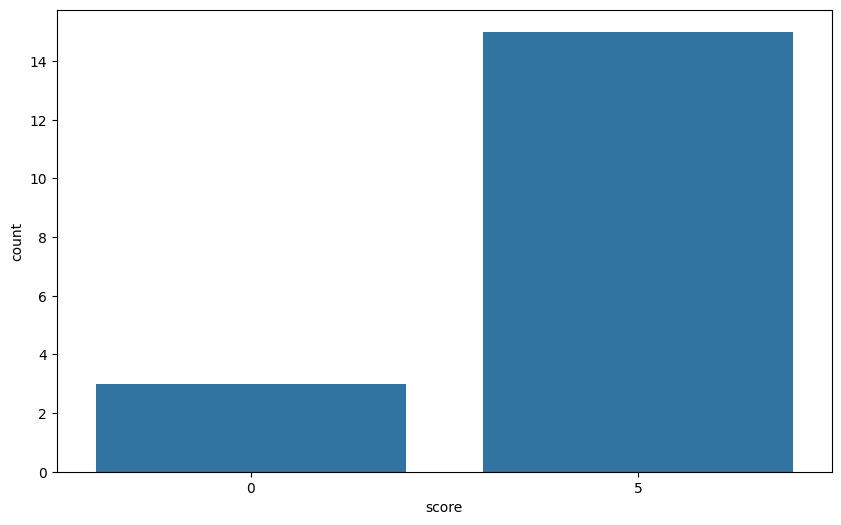

In [171]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [172]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [173]:
import nltk
from nltk.tokenize import word_tokenize

In [174]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [175]:
from gensim.models import Word2Vec

In [176]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [177]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [178]:
df.head(5)

,question_id,student_answer,score,tokens,textvector
0,8,الملك هو الروح الامين جبريل,5,"[الملك, هو, الروح, الامين, جبريل]","[0.0015203783, -0.009046177, -0.0044414904, 0...."
1,8,جبريل,5,[جبريل],"[-0.00054094684, 0.00023814959, 0.005105486, 0..."
2,8,جبريل عليه السلام,5,"[جبريل, عليه, السلام]","[-0.009185811, 0.005455496, -0.0025774431, -0...."
3,8,جبريل عليه السلام,5,"[جبريل, عليه, السلام]","[-0.009185811, 0.005455496, -0.0025774431, -0...."
4,8,جبريل الأمين,5,"[جبريل, الأمين]","[-0.008790704, 0.009544749, 0.004907059, 0.007..."
